<a href="https://colab.research.google.com/github/dowonshun/machine_learning/blob/main/MNISTExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Tensorflow 2.x 강의 10]

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import numpy as np
from tensorflow.keras.datasets import mnist

TensorFlow version: 2.18.0


In [ ]:
# Load a data set
# tf.keras.datasets.mnist는 MNIST 데이터셋(손글씨 숫자 이미지, 0~9)을 제공하는 Keras의 내장 데이터셋
#mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print('\n train label =', x_train)
print('test label =', y_test)

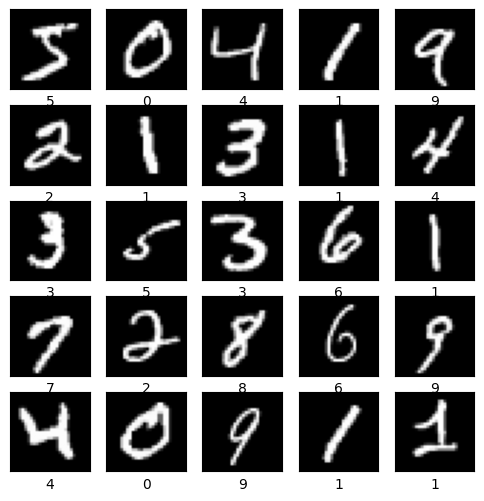

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
#데이터전처리
x_train = (x_train-0.0)/(255.0-0.0)
x_test = (x_test-0.0)/(255.0-0.0)

print(x_train)
print(x_test)

# One-hot incoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train)
print(y_test)

In [11]:
# Build a machine learning model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (28, 28)  2D 이미지를 1D 벡터 (길이 784) 로
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 128개의 뉴런 Rectified Linear Unit 활성화 함수 f(x)=max(0,x)
  tf.keras.layers.Dense(10, activation='softmax') # output layer 10개의 뉴런 softmax 활성화 함수 f(x)=exp(x)/sum(exp(x))
])

In [16]:

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
print("y_train shape:", y_train.shape)
print("model output shape:", model.output_shape)

y_train shape: (60000, 10)
model output shape: (None, 10)


In [18]:
#Train the model
hist=model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5095 - loss: 1.8302 - val_accuracy: 0.8350 - val_loss: 0.7389
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8377 - loss: 0.6685 - val_accuracy: 0.8848 - val_loss: 0.4630
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8780 - loss: 0.4625 - val_accuracy: 0.8970 - val_loss: 0.3806
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8949 - loss: 0.3925 - val_accuracy: 0.9055 - val_loss: 0.3405
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9025 - loss: 0.3559 - val_accuracy: 0.9096 - val_loss: 0.3203
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9044 - loss: 0.3366 - val_accuracy: 0.9127 - val_loss: 0.3060
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9095 - loss: 0.3168 - val_accuracy: 0.9163 - val_loss: 0.2921
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9107 - loss: 0.309

In [19]:
#Evaluation
model.evaluate(x_test,  y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9404 - loss: 0.1999


[0.17623884975910187, 0.9485999941825867]

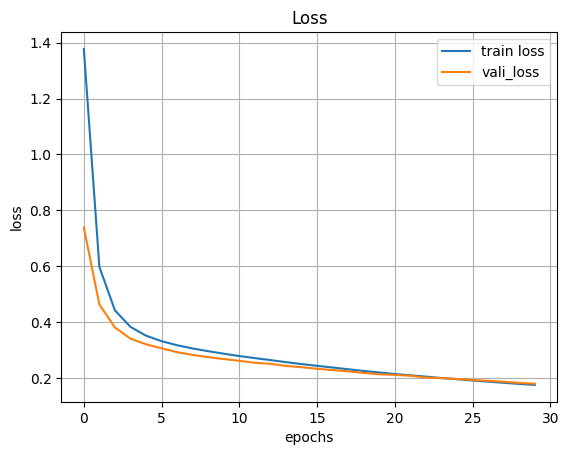

In [20]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='vali_loss')
plt.legend(loc='best')
plt.show()

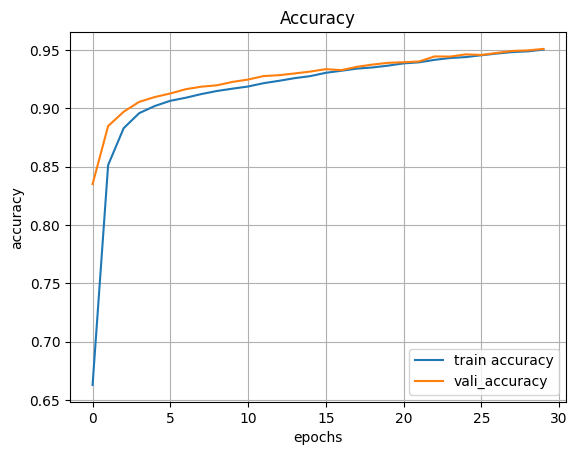

In [21]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='vali_accuracy')

plt.legend(loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


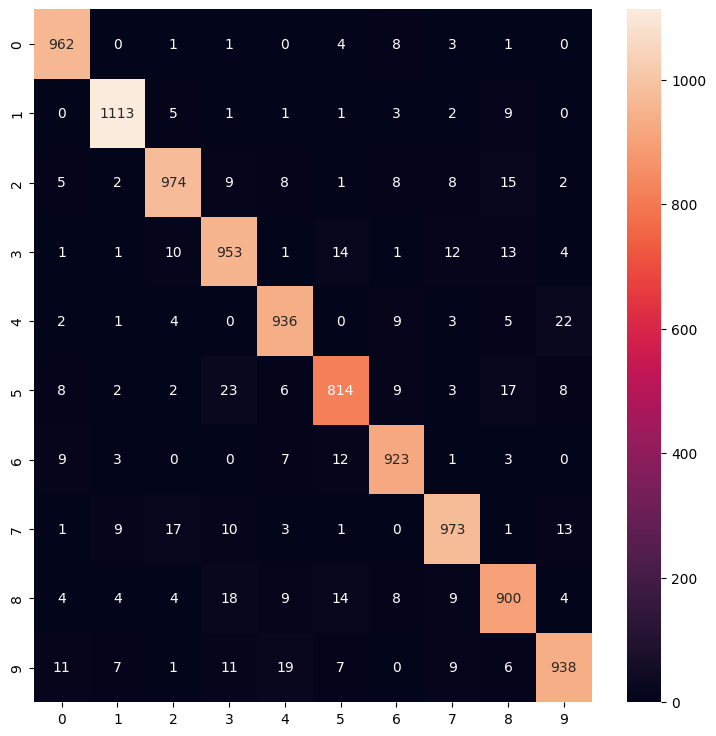

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(9,9))
predicted_value = model.predict(x_test)
cm=confusion_matrix(np.argmax(y_test,axis=1),
                    np.argmax(predicted_value,axis=-1))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [24]:
print(cm)
print('\n')

for i in range(10):
  print(('label = %d\t(%d/%d)\taccuracy = %.3f')%
        (i, np.max(cm[i]), np.sum(cm[i]),
         np.max(cm[i])/np.sum(cm[i])))

[[ 962    0    1    1    0    4    8    3    1    0]
 [   0 1113    5    1    1    1    3    2    9    0]
 [   5    2  974    9    8    1    8    8   15    2]
 [   1    1   10  953    1   14    1   12   13    4]
 [   2    1    4    0  936    0    9    3    5   22]
 [   8    2    2   23    6  814    9    3   17    8]
 [   9    3    0    0    7   12  923    1    3    0]
 [   1    9   17   10    3    1    0  973    1   13]
 [   4    4    4   18    9   14    8    9  900    4]
 [  11    7    1   11   19    7    0    9    6  938]]


label = 0	(962/980)	accuracy = 0.982
label = 1	(1113/1135)	accuracy = 0.981
label = 2	(974/1032)	accuracy = 0.944
label = 3	(953/1010)	accuracy = 0.944
label = 4	(936/982)	accuracy = 0.953
label = 5	(814/892)	accuracy = 0.913
label = 6	(923/958)	accuracy = 0.963
label = 7	(973/1028)	accuracy = 0.946
label = 8	(900/974)	accuracy = 0.924
label = 9	(938/1009)	accuracy = 0.930
